In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.chdir("/home/hilinxinhui/Desktop/data-driven-capacity-estimation-from-voltage-relaxation/")
dataset_names = ["Dataset_1_NCA_battery", "Dataset_2_NCM_battery", "Dataset_3_NCM_NCA_battery"]

## Dataset_1_NCA_battery

In [3]:
dataset_id = 1
dataset_name = dataset_names[dataset_id - 1]
file_paths = [os.path.join(dataset_name, f) for f in os.listdir(dataset_name) if f.endswith("pkl")]
file_paths.sort()
print(len(file_paths), file_paths)

time_scaler = MinMaxScaler(feature_range=(0, 1))
current_scaler = MinMaxScaler(feature_range=(0, 1))
voltage_scaler = MinMaxScaler(feature_range=(0, 1))
soh_scaler = MinMaxScaler(feature_range=(0, 1))
rul_scaler = MinMaxScaler(feature_range=(0, 1))

for file_path in file_paths:
    # print(file_path)
    name = os.path.basename(file_path).split(".")[0]
    print(name)
    cycle_data = pickle.load(open(file_path, "rb")) # cycle_num, time, current, voltage, temperature, capacity(soh), rul
    capacity_max = np.max(cycle_data[:, 5])
    rul_max = np.max(cycle_data[:, 6])
    print(capacity_max, rul_max)
    samples = []
    for data in cycle_data:
        time = signal.savgol_filter(np.array(time_scaler.fit_transform(signal.resample(data[1], 128).reshape(-1, 1))).flatten()[16:-16], 7, 1)
        current = signal.savgol_filter(np.array(current_scaler.fit_transform(signal.resample(data[2], 128).reshape(-1, 1))).flatten()[16:-16], 7, 1)
        voltage = signal.savgol_filter(np.array(voltage_scaler.fit_transform(signal.resample(data[3], 128).reshape(-1, 1))).flatten()[16:-16], 7, 1)
        # soh = data[5] / capacity_max
        # rul = data[6] / rul_max

        sample_data = np.vstack((time, current, voltage))
        sample_label = data[-3], data[-1] / rul_max # temperature, rul
        samples.append((sample_data, sample_label))

    samples = np.array(samples, dtype=object)
    with open("./Dataset_1_NCA_battery/" + "sampled_" + name + ".pkl", "wb") as f:
        pickle.dump(samples, f)

66 ['Dataset_1_NCA_battery/CY25-025_1-#1.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#2.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#3.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#4.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#5.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#6.pkl', 'Dataset_1_NCA_battery/CY25-025_1-#7.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#1.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#10.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#11.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#12.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#13.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#14.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#15.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#16.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#17.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#18.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#19.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#2.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#3.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#4.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#5.pkl', 'Dataset_1_NCA_battery/CY25-05_1-#6.pkl', 'Dataset_1_NC

In [4]:
len(samples)
for sample in samples:
    print(sample[0].shape, sample[1])

(3, 96) (45, 1.0)
(3, 96) (45, 0.9975)
(3, 96) (45, 0.995)
(3, 96) (45, 0.9925)
(3, 96) (45, 0.99)
(3, 96) (45, 0.9875)
(3, 96) (45, 0.985)
(3, 96) (45, 0.9825)
(3, 96) (45, 0.98)
(3, 96) (45, 0.9775)
(3, 96) (45, 0.975)
(3, 96) (45, 0.9725)
(3, 96) (45, 0.97)
(3, 96) (45, 0.9675)
(3, 96) (45, 0.965)
(3, 96) (45, 0.9625)
(3, 96) (45, 0.96)
(3, 96) (45, 0.9575)
(3, 96) (45, 0.955)
(3, 96) (45, 0.9525)
(3, 96) (45, 0.95)
(3, 96) (45, 0.9475)
(3, 96) (45, 0.945)
(3, 96) (45, 0.9425)
(3, 96) (45, 0.94)
(3, 96) (45, 0.9375)
(3, 96) (45, 0.935)
(3, 96) (45, 0.9325)
(3, 96) (45, 0.93)
(3, 96) (45, 0.9275)
(3, 96) (45, 0.925)
(3, 96) (45, 0.9225)
(3, 96) (45, 0.92)
(3, 96) (45, 0.9175)
(3, 96) (45, 0.915)
(3, 96) (45, 0.9125)
(3, 96) (45, 0.91)
(3, 96) (45, 0.9075)
(3, 96) (45, 0.905)
(3, 96) (45, 0.9025)
(3, 96) (45, 0.9)
(3, 96) (45, 0.8975)
(3, 96) (45, 0.895)
(3, 96) (45, 0.8925)
(3, 96) (45, 0.89)
(3, 96) (45, 0.8875)
(3, 96) (45, 0.885)
(3, 96) (45, 0.8825)
(3, 96) (45, 0.88)
(3, 96) (45

## Dataset_2_NCM_battery

In [ ]:
files = os.listdir('./Dataset_2_NCM_battery/')
for file in range(len(files)):
    df_res = pd.DataFrame(columns=['cycle', 'Voltages', 'rate', 'Tem', 'Capacity'])    
    # 读取一块电池数据对应的csv文件
    data_r = pd.read_csv(os.path.join('./Dataset_2_NCM_battery/', files[file]))
    # 一块电池的循环数据
    min_cycle_number = int(np.min(data_r['cycle number'].values))
    max_cycle_number = int(np.max(data_r['cycle number'].values)) + 1
    total_rul = max_cycle_number - min_cycle_number
    Tem = int(files[file][2:4]) # 设定的恒温室的温度，不是电池表面温度
    for i in range(int(np.min(data_r['cycle number'].values)), int(np.max(data_r['cycle number'].values))+1):
        # 读取当前电池的一个循环的数据
        data_i = data_r[data_r['cycle number'] == i] # 第i个循环的数据
        time = np.array(data_i['time/s']) # 距离开始时间点的时间（序列）
        Ecell = np.array(data_i['Ecell/V']) # 电压序列
        Q_dis = np.array(data_i['Q discharge/mA.h']) # 放电容量序列，最大放电容量是capacity标签
        # Q_ch = np.array(data_i['Q charge/mA.h']) # 充电容量序列，可以结合Q_dis计算电荷量序列
        Current = np.array(data_i['<I>/mA']) # 电流序列
        control = np.array(data_i['control/V/mA']) # 控制字段，3500表示CC充电，4.x的值指示CV充电，-3500表示CC放电
        cr = np.array(data_i['control/mA'])[1]/3500 # 充电倍率，cr和上一行的control字段完全一致

        # 电池容量异常的情况下丢弃这个循环的数据
        if np.max(Q_dis) < 2500:
            continue

        # index = np.where(np.abs(control) == 0) # 控制序列有0值的情况：
        # start = index[0][0]
        # end = 13
        # for j in range(3):
        #     if control[start+3] == 0:
        #         break
        #     else:
        #         start = index[0][j+1]
        # if Current[start] > 1:
        #     start = start + 1
        #     if control[start + 13] != 0:
        #         end = 12
        # if control[start + end] == 0 and Ecell[start + end] > 4.0:
        #     df_res = df_res._append({'cycle': i, 'Voltages': Ecell[start:start+14], 'rate': cr, 'Tem': Tem,
        #                             'Capacity': np.max(Q_dis)}, ignore_index=True) # https://zhuanlan.zhihu.com/p/655528474

        df_res = df_res._append({'cycle': i, "time": time, "Current": Current, 'Voltages': Ecell, 'Tem': Tem,
                                'Capacity': np.max(Q_dis)}, ignore_index=True)
    df_res.to_csv(os.path.join('./Dataset_2_NCM_battery/', "processed_" + files[file]), index=False)
    print(f"battery {files[file]} processed data saved")

In [ ]:
# # 打印充放电采样时间、电压电流和容量退化曲线

# # 创建一个包含四个子图的图表
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# fig.suptitle(files[file])

# # 子图1: 电池在一个循环中的采样时间
# axs[0, 0].plot(df_res["time"][0])
# axs[0, 0].set_title('Battery Sampling Time')
# axs[0, 0].set_xlabel('Time (s)')
# axs[0, 0].set_ylabel('Sampling Time')

# # 子图2: 充放电电流
# axs[0, 1].plot(df_res["Current"][0])
# axs[0, 1].set_title('Charge/Discharge Current')
# axs[0, 1].set_xlabel('Time (s)')
# axs[0, 1].set_ylabel('Current')

# # 子图3: 充放电电压
# axs[1, 0].plot(df_res["Voltages"][0])
# axs[1, 0].set_title('Charge/Discharge Voltage')
# axs[1, 0].set_xlabel('Time (s)')
# axs[1, 0].set_ylabel('Voltage')

# # 子图4: 容量退化曲线
# axs[1, 1].plot(df_res['Capacity'])
# axs[1, 1].set_title('Capacity Degradation')
# axs[1, 1].set_xlabel('cycle')
# axs[1, 1].set_ylabel('Capacity')

# # 调整子图之间的间距
# plt.tight_layout()

# # 显示图表
# plt.show()

## Dataset_3_NCM_NCA_battery

In [16]:
# files = os.listdir('./Dataset_3_NCM_NCA_battery/')
# for file in range(len(files)):
#     df_res = pd.DataFrame(columns=['cycle', 'Voltages', 'C_rate', 'D_rate', 'Tem', 'Capacity'])
#     data_to_save = []
#     Tem = int(files[file][2:4])
#     data_r = pd.read_csv(os.path.join('./Dataset_3_NCM_NCA_battery/', files[file]))
#     k = np.min(data_r['cycle number'].values)
#     data_k = data_r[data_r['cycle number'] == k]
#     Q_p = np.max(np.array(data_k['Q discharge/mA.h']))
#     delta = 1
#     for i in range(int(np.min(data_r['cycle number'].values)), int(np.max(data_r['cycle number'].values))+1):
#         data_i = data_r[data_r['cycle number'] == i]
#         time = np.array(data_i['time/s'])
#         Ecell = np.array(data_i['Ecell/V'])
#         Q_ch = np.array(data_i['Q charge/mA.h'])
#         Q_max = np.max(Q_ch) # 这是一个值
#         Q_ch_corrected = []
#         for cnt, q in enumerate(Q_ch):
#             if cnt > 0 and q == 0:
#                 Q_ch_corrected.append(Q_max)
#             else:
#                 Q_ch_corrected.append(q)
#         Q_ch_corrected = np.array(Q_ch_corrected)
#         Q_dis = np.array(data_i['Q discharge/mA.h'])
#         SOC = (Q_ch_corrected - Q_dis) / Q_max
#         Current = np.array(data_i['<I>/mA'])
#         control = np.array(data_i['control/V/mA'])
#         cr = np.array(data_i['control/mA'])[1] / 2500
#         cr_d = int(files[file][8])
#         if np.max(Q_dis) < 1650 or np.max(Q_dis) > 2510:
#             delta = delta + 1
#             continue
#         # Remove points where capacity changes too quickly
#         if np.abs(np.max(Q_dis) - Q_p) > delta * 10:
#             delta = delta + 1
#             continue
#         delta = 1
#         Q_p = np.max(Q_dis)

#         # index = np.where(np.abs(control) == 0) # 控制序列有0值的情况：
#         # start = index[0][0]
#         # end = 13
#         # for j in range(3):
#         #     if control[start+3] == 0:
#         #         break
#         #     else:
#         #         start = index[0][j+1]
#         # if Current[start] > 1:
#         #     start = start + 1
#         #     if control[start + 13] != 0:
#         #         end = 12
#         # if control[start + end] == 0 and Ecell[start + end] > 4.0:
#         #     df_res = df_res._append({'cycle': i, 'Voltages': Ecell[start:start+14], 'rate': cr, 'Tem': Tem,
#         #                             'Capacity': np.max(Q_dis)}, ignore_index=True) # https://zhuanlan.zhihu.com/p/655528474

#         df_res = df_res._append({'cycle': i, "time": time, "Current": Current, 'Voltages': Ecell, 'Tem': Tem,
#                                 'Capacity': np.max(Q_dis)}, ignore_index=True)
#         data_to_save.append([i, time, Current, Ecell, Tem, SOC, np.max(Q_dis)])
#     data_to_save = np.array(data_to_save, dtype=object)
#     with open(os.path.join('./Dataset_3_NCM_NCA_battery/', "processed_" + files[file].split(".")[0] + ".pkl"), "wb") as f:
#         pickle.dump(data_to_save, f)
#     df_res.to_csv(os.path.join('./Dataset_3_NCM_NCA_battery/', "processed_" + files[file]), index=False)
#     # pkl_file = df_res.values
    
#     print(f"battery {files[file]} processed data saved")

battery CY25-05_2-#1.csv processed data saved
battery CY25-05_1-#1.csv processed data saved
battery CY25-05_1-#2.csv processed data saved
battery CY25-05_4-#2.csv processed data saved
battery CY25-05_2-#2.csv processed data saved
battery CY25-05_4-#3.csv processed data saved
battery CY25-05_4-#1.csv processed data saved
battery CY25-05_2-#3.csv processed data saved
battery CY25-05_1-#3.csv processed data saved


In [ ]:
# # 打印充放电采样时间、电压电流和容量退化曲线

# # 创建一个包含四个子图的图表
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# fig.suptitle(files[file])

# # 子图1: 电池在一个循环中的采样时间
# axs[0, 0].plot(df_res["time"][0])
# axs[0, 0].set_title('Battery Sampling Time')
# axs[0, 0].set_xlabel('Time (s)')
# axs[0, 0].set_ylabel('Sampling Time')

# # 子图2: 充放电电流
# axs[0, 1].plot(df_res["Current"][0])
# axs[0, 1].set_title('Charge/Discharge Current')
# axs[0, 1].set_xlabel('Time (s)')
# axs[0, 1].set_ylabel('Current')

# # 子图3: 充放电电压
# axs[1, 0].plot(df_res["Voltages"][0])
# axs[1, 0].set_title('Charge/Discharge Voltage')
# axs[1, 0].set_xlabel('Time (s)')
# axs[1, 0].set_ylabel('Voltage')

# # 子图4: 容量退化曲线
# axs[1, 1].plot(df_res['Capacity'])
# axs[1, 1].set_title('Capacity Degradation')
# axs[1, 1].set_xlabel('cycle')
# axs[1, 1].set_ylabel('Capacity')

# # 调整子图之间的间距
# plt.tight_layout()

# # 显示图表
# plt.show()

(944, 7)


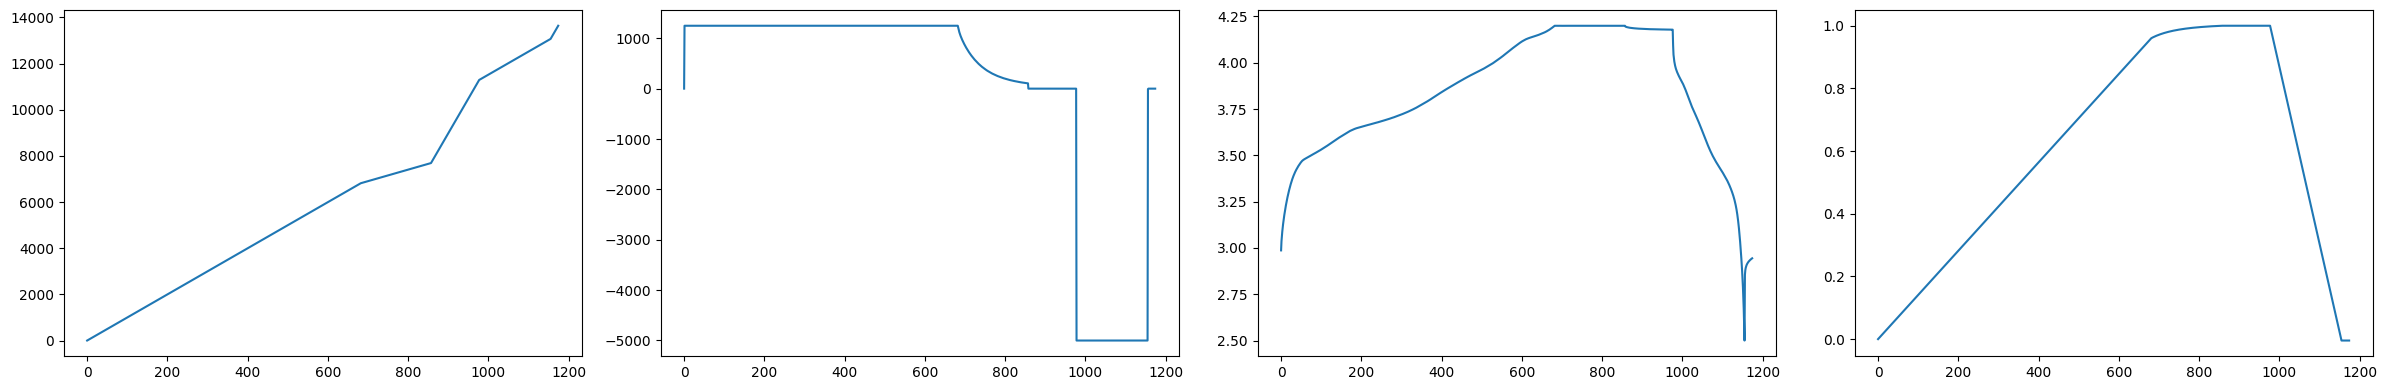

In [24]:
# from scipy import signal
# # Voltage (a) and current (b) profile of the first cycle of a NCA battery cell at 25°C with a 1C charge and a 1C discharge current rate.
# import pandas as pd
# import matplotlib.pyplot as plt
# data_path = "./Dataset_3_NCM_NCA_battery/processed_CY25-05_2-#2.pkl"
# data = np.load(data_path, allow_pickle=True)

# print(data.shape)

# for i in data:
#     # 创建一个包含两个子图的图表
#     fig, axs = plt.subplots(1, 4, figsize=(24, 4))
#     axs[0].plot(i[1])
#     axs[1].plot(i[2])
#     axs[2].plot(i[3])
#     # resampled_v_fft = signal.resample(i[3], 128) # 默认为fft采样
#     # axs[3].plot(resampled_v_fft)
#     axs[3].plot(i[5])

#     plt.tight_layout()
#     plt.show()
#     break


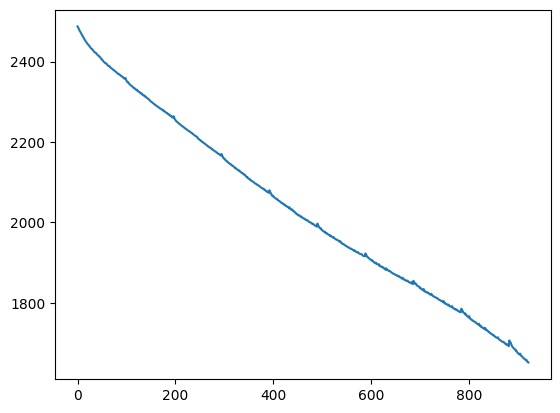

In [68]:
# plt.plot(data[:, -1])